# Laboratory Experiment 001: Differential Amplifier
This notebook simulates the structure, operation, and applications of a differential amplifier.

- **Name:** Engr. Divino Fiel A. de Bien
- **Term:** 2nd AY 2024-2025

### [Optional] Install the Python Packages:

In [1]:
!pip install numpy

  Using cached numpy-2.2.2-cp312-cp312-macosx_10_13_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.2-cp312-cp312-macosx_10_13_x86_64.whl (20.9 MB)


In [2]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-macosx_10_13_x86_64.whl (8.2 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl (271 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.6 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl (66 kB)
Using cached pillow-11.1.0-cp312-cp312-macosx_10_13_x86_64.whl (3.2 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


In [3]:
!pip install scipy

  Using cached scipy-1.15.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (61 kB)
Using cached scipy-1.15.1-cp312-cp312-macosx_10_13_x86_64.whl (41.5 MB)


## Import the Python Packages:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step

## Define Differential Amplifier Parameters
Parameters:
- **$A_d$**: Differential mode gain (Amplifies the difference between inputs)
- **$A_c$**: Common mode gain (Ideally should be minimized for noise rejection)
- **CMRR**: Common-mode rejection ratio, defined as the ratio of $A_d$ to $A_c$

In [5]:
A_d = 10  # Differential mode gain
A_c = 0.1  # Common mode gain
CMRR = A_d / A_c  # Common-mode rejection ratio

print(f'Common-Mode Rejection Ratio (CMRR): {CMRR:.2f}')

Common-Mode Rejection Ratio (CMRR): 100.00


## Generate Input Signals
- **$V_1$**: Sine wave input representing one signal source
- **$V_2$**: Sine wave with half the amplitude, representing the second input
- **T**: Time vector for plotting the signals

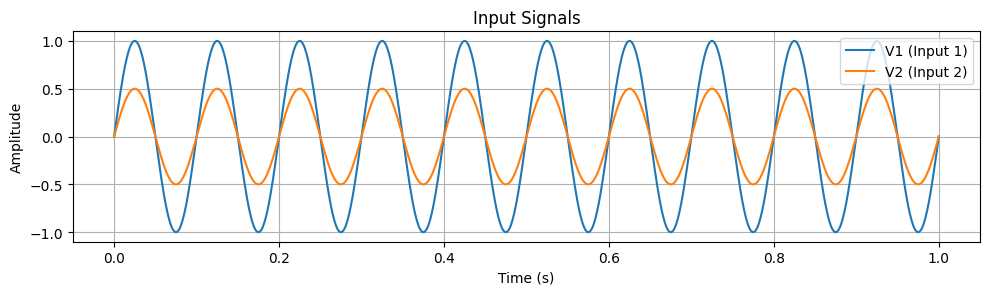

In [6]:
T = np.linspace(0, 1, 1000)  # Time vector
V1 = np.sin(2 * np.pi * 10 * T)  # Input signal 1
V2 = 0.5 * np.sin(2 * np.pi * 10 * T)  # Input signal 2 (different amplitude)

# Plot input signals
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(T, V1, label='V1 (Input 1)')
plt.plot(T, V2, label='V2 (Input 2)')
plt.title('Input Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Compute Differential and Common-Mode Signals
- **V_diff**: Difference between V1 and V2 (true signal to be amplified)

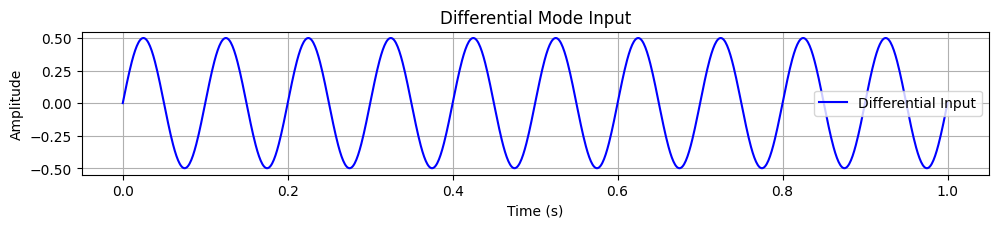

In [7]:
V_diff = V1 - V2

# Plot differential input voltage
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(T, V_diff, label='Differential Input', color='b')
plt.title('Differential Mode Input')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

- **V_common**: Average of V1 and V2 (undesired noise component)

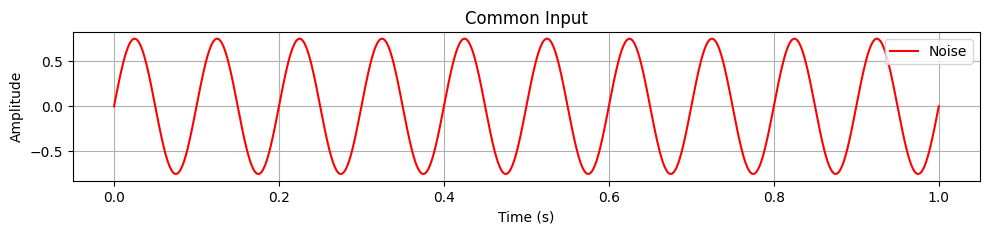

In [8]:
V_common = (V1 + V2) / 2

# Plot average common voltage
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 2)
plt.plot(T, V_common, label='Noise', color='r')
plt.title('Common Input')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Compute Amplifier Output
- **V_out_diff**: Amplified differential mode output

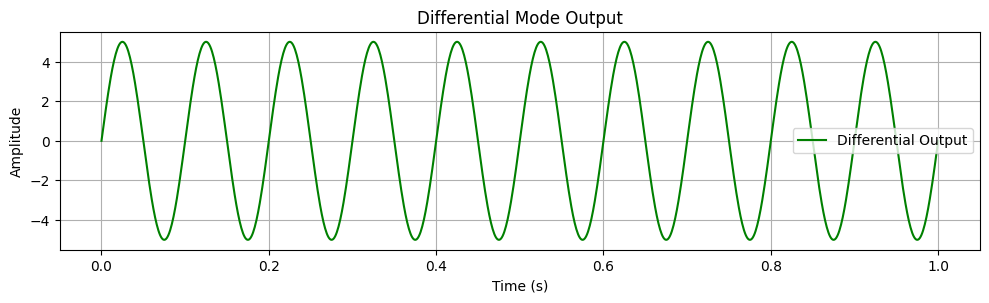

In [9]:
V_out_diff = A_d * V_diff

# Plot differential mode output
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 2)
plt.plot(T, V_out_diff, label='Differential Output', color='g')
plt.title('Differential Mode Output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

- **V_out_common**: Common-mode output contribution

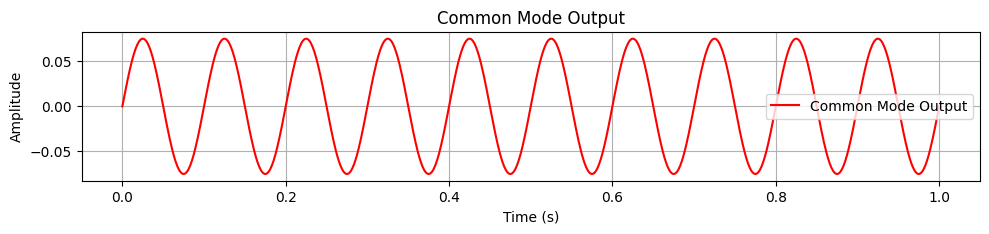

In [10]:
V_out_common = A_c * V_common

# Plot differential mode output
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 3)
plt.plot(T, V_out_common, label='Common Mode Output', color='r')
plt.title('Common Mode Output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

- **V_out_total**: Final amplifier output including both modes

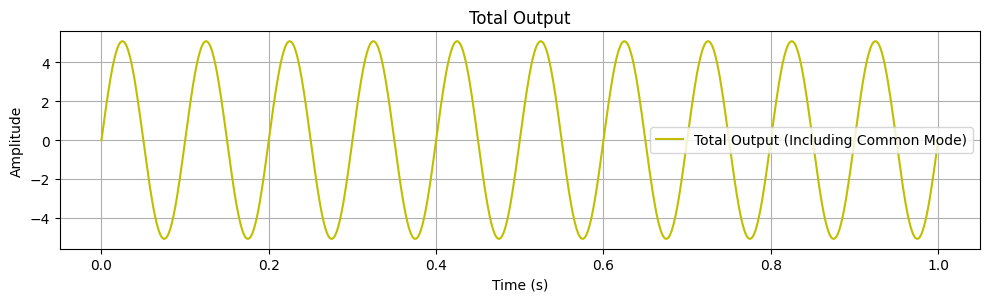

In [11]:
V_out_total = V_out_diff + V_out_common

# Plot total output
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 3)
plt.plot(T, V_out_total, label='Total Output (Including Common Mode)', color='y')
plt.title('Total Output')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()